# Part 1

## Imports

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
logins = pd.read_json('./logins.json')
print(logins.head())


           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21


In [53]:
# Check types and how many features/entries
print(logins.dtypes)
print(logins.shape)

# Set the index to login time for time series data
logins.set_index(logins['login_time'], inplace=True)

login_time    datetime64[ns]
dtype: object
(93142, 1)


In [54]:
# resample to aggregate login counts per 15 minutes
df_15 = logins.resample("15min").count()
df_15.rename({'login_time': 'count'}, axis=1, inplace=True)
df_15.head(5)

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


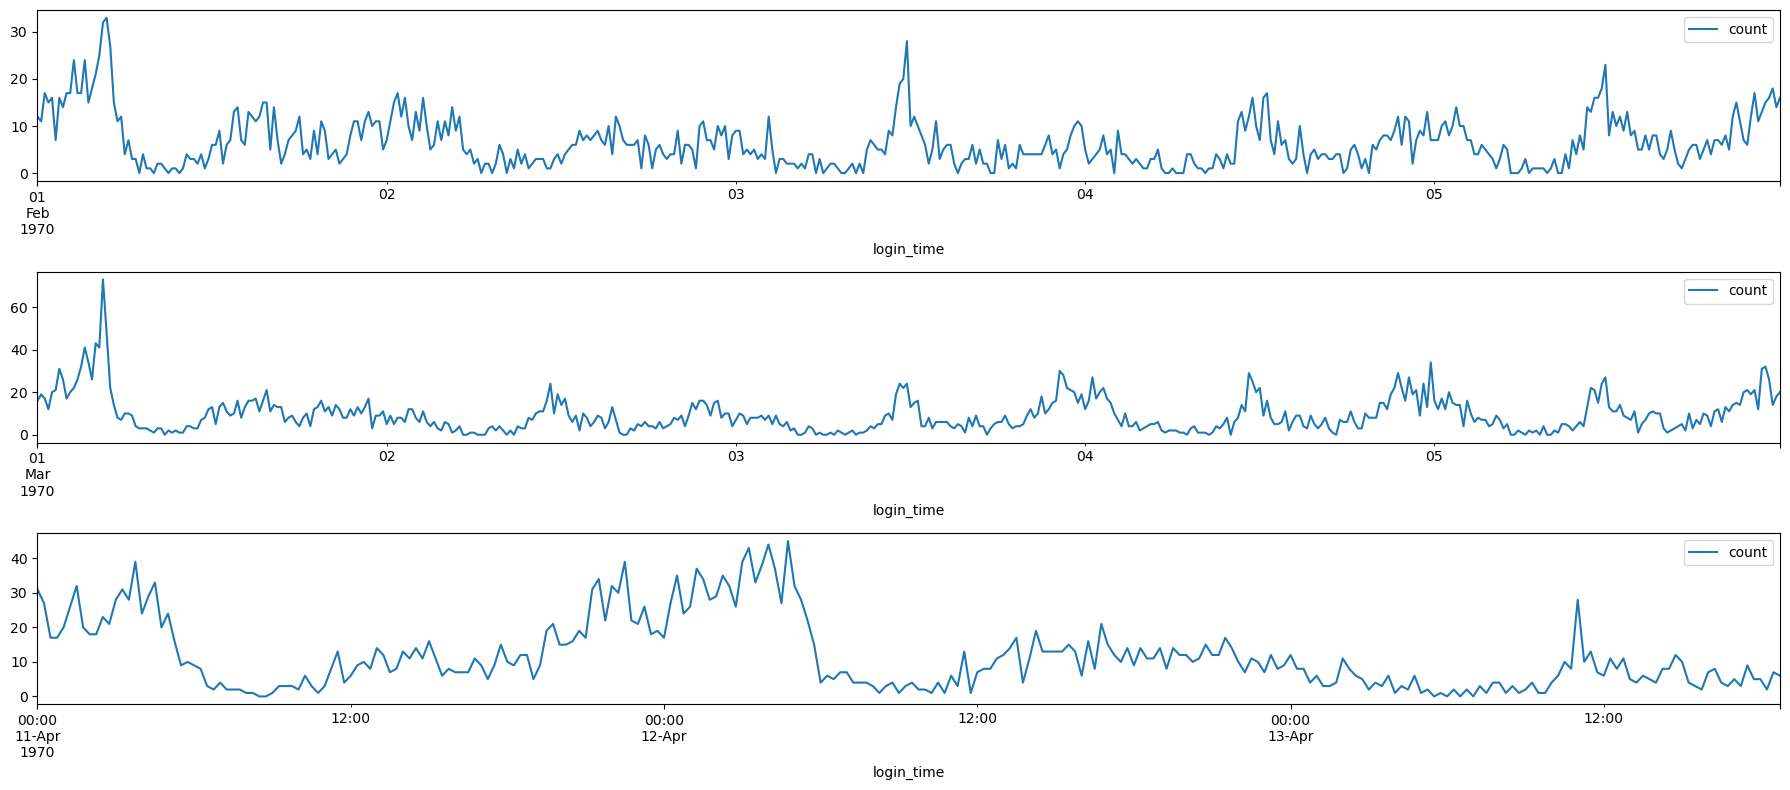

In [80]:
fig, ax = plt.subplots(3, 1, figsize=(18,8), sharex=False)
subset1 = df_15['02-01-1970':'02-05-1970']
subset2 = df_15['03-01-1970':'03-05-1970']
subset3 = df_15['04-11-1970':'04-15-1970']

subset1.plot(ax=ax[0])
subset2.plot(ax=ax[1])
subset3.plot(ax=ax[2])

plt.tight_layout()
plt.show()

There are no clear patterns, but there does the data tends to have daily spikes at noon.
<br>
It may be useful to investigate weekday vs weekend trends or month vs month trends.